In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [10]:
def find_component(node, connected_components):
    for i, component in enumerate(connected_components):
        if node in component:
            return i
    raise ValueError(f'Component for node {node} not found')

In [11]:
def cascade_remove(Ga, Gb, nodes_to_remove):

    Ga.remove_nodes_from(nodes_to_remove)
    Gb.remove_nodes_from(nodes_to_remove)

    keep_going = True
    while keep_going:
        keep_going = False

        clusters_a = list(nx.connected_components(Ga))
        for edge in Gb.edges():
            if find_component(edge[0], clusters_a) != find_component(edge[1], clusters_a):
                keep_going = True
                Gb.remove_edge(*edge)

        clusters_b = list(nx.connected_components(Gb))
        for edge in Ga.edges():
            if find_component(edge[0], clusters_b) != find_component(edge[1], clusters_b):
                keep_going = True
                Ga.remove_edge(*edge)
    
    return Ga, Gb

In [21]:
crange = np.linspace(0, 7, 100)
tvals = range(4)
n_ap = []
N = 100
nruns = 100

for c in tqdm(crange):

    num = np.zeros(len(tvals), dtype=float)

    for _ in range(nruns):
    
        G1 = nx.erdos_renyi_graph(N, c / (N-1))
        G2 = nx.erdos_renyi_graph(N, c / (N-1))
        ap1 = set(nx.articulation_points(G1))
        ap2 = set(nx.articulation_points(G2))
        ap = ap1.union(ap2)
        G1, G2 = cascade_remove(G1, G2, ap)

        for i in range(len(tvals)):

            ap1 = set(nx.articulation_points(G1))
            ap2 = set(nx.articulation_points(G2))
            ap = ap1.union(ap2)
            num[i] += len(ap) / len(G1)
            G1, G2 = cascade_remove(G1, G2, ap)

    n_ap.append(num / nruns)

n_ap = np.array(n_ap)

100%|██████████| 100/100 [01:06<00:00,  1.50it/s]


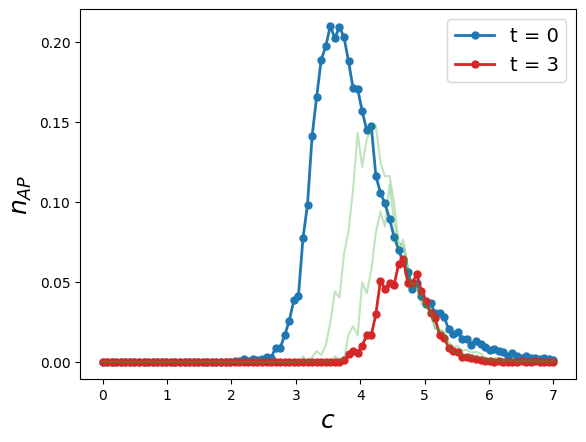

In [22]:
lw, ms = 2, 5
plt.plot(crange, n_ap[:, 0], 'o-', lw=lw, ms=ms, color='tab:blue', label=f't = {0}')
plt.plot(crange, n_ap[:, -1], 'o-', lw=lw, ms=ms, color='tab:red', label=f't = {tvals[-1]}')
plt.plot(crange, n_ap[:, 1:-1], '-', color='tab:green', alpha=.3)
plt.xlabel('$c$', fontdict={'size': 18})
plt.ylabel('$n_{AP}$', fontdict={'size': 18})
plt.legend(fontsize=14)
plt.savefig('plots/multiplex_ap.png')